In [1]:
# Goal: construct synthetic-photometry LC from spectral sequence
import sys, os
import warnings
warnings.filterwarnings("ignore", module="dynesty.sampling")
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as aconst
import astropy.units as u
from dynesty import plotting as dyplot
from dynesty import utils as dyfunc
import astropy.table as table
from astropy.cosmology import Planck15 as cosmology

try:
    import snelib19odp
except ImportError:
    sys.path.append('../lib')
import snelib19odp.dataloader as dataloader
import snelib19odp.const as const
import snelib19odp.analysis.oxygen as oxygen
import snelib19odp.blackbody as blackbody
import snelib19odp.specds as specds
import snelib19odp.synphot as synphot

In [2]:
sds = specds.load_dataset('SN2019odp')

In [3]:
# load the ZTF filter curves
filters = {}
for band in 'gri':
    filters[band] = synphot.load_filter('Palomar_ZTF', band, return_format='table')

In [24]:
data = {'mjd': []}
for band in 'gri':
    data[band] = []
for name in sds.names:
    spec = sds[name]
    if spec.meta['obs_mjd'] > 58900:
        continue
    data['mjd'].append(spec.meta['obs_mjd'])
    for band in 'gri':
        mag = synphot.spec2mag(spec, filters[band])
        data[band].append(mag)
t = table.Table(data)
t

<Table length=27>
       mjd                 g                  r                  i         
     float64            float64            float64            float64      
------------------ ------------------ ------------------ ------------------
 58717.16157175926  17.96313537292047  18.22452322839586 18.538728012883844
 58718.22459574074  17.96766258745044 18.198239054724233 18.506998603012484
58718.455274305554 18.012018309815907 18.168709968753966 18.562726472714054
 58720.17771296296  17.65030287622175  17.65444922487419 18.317902724197673
58722.364243958335  16.93788894480101 17.074003872465475  17.65684322112002
58723.171329861114  16.68936077790793 16.896389279485355 17.525364444373345
 58725.98322789352 16.377723256843062  16.44388643432965 16.816967629062297
 58727.20590277778 16.172467780119753 16.295912294898734 16.670026914192952
58736.305526620374 15.948287921971122 15.850151879831905   16.1160666688828
 58743.32268981481 16.338890341738114 15.898401940731752 16.027940561930954
               ...                ...                ...                ...
58783.149202546294 18.056696942052064  17.24515783934104  17.04591535566319
 58791.08497106482 17.960664737010937 17.381829685289823  17.10118122079036
 58798.14837847222  17.93597012426101 17.502269003847992 17.272267337305145
58809.930904085646 18.301955245520382  17.67785328978095  17.32052299160147
 58811.25869212963  17.95691311355869 17.693625057899972  17.32059635354107
58835.101890055186  18.08837962295089 18.061475138983887  17.51161872882701
  58838.1655508998 17.946311115568697 18.102029597136685 17.836024663730136
 58852.14001736111 18.782213046303546 18.279991097855493 18.062926330946873
 58861.85248678241 18.944678202439043 18.433506814657882 18.097933758829292
 58872.22917824074 19.269356263783045 18.566426699659438   18.3450359587766

<ErrorbarContainer object of 3 artists>

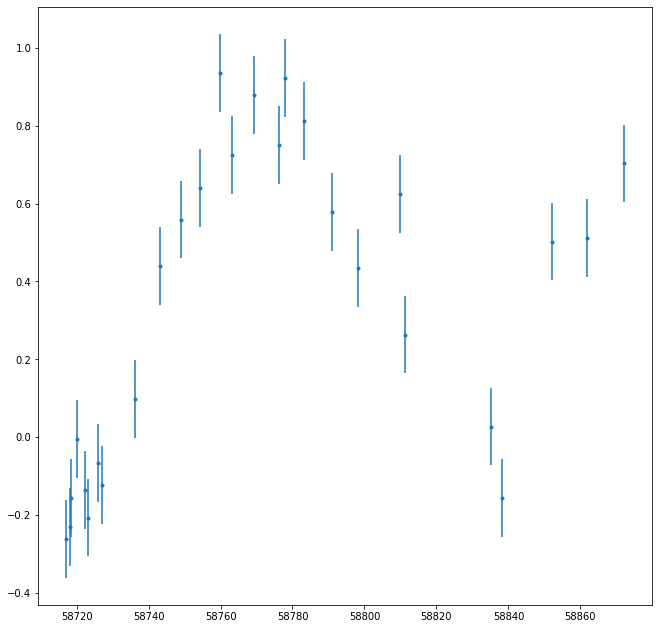

In [28]:
plt.figure(figsize=(11,11))
plt.errorbar(t['mjd'], t['g']-t['r'], yerr=0.1, ls='', marker='.')

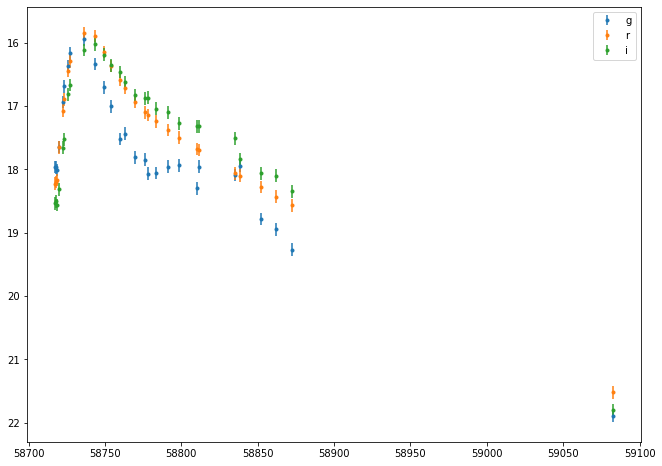

In [19]:
plt.figure(figsize=(11,8))
for band in 'gri':
    plt.errorbar(t['mjd'], t[band], yerr=0.1, ls='', marker='.', label=band)
plt.legend()
plt.gca().invert_yaxis()

<ErrorbarContainer object of 3 artists>

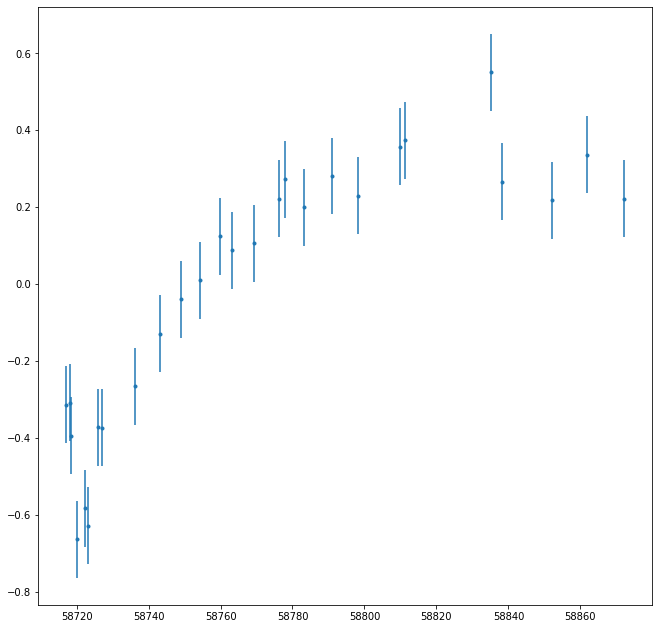

In [29]:
plt.figure(figsize=(11,11))
plt.errorbar(t['mjd'], t['r']-t['i'], yerr=0.1, ls='', marker='.')